# 13.4.3 Funciones de activación no saturantes

## Funciones de activación populares

<div align="center">

|Nombre|Definición|Rango|
|:-|:-|:-|
|Sigmoide|$\sigma(a)=\dfrac{1}{1+e^{-a}}$|$[0,1]$|
|Tangente hiperbólica|$\tanh(a)=2\,\sigma(2a)-1$|$[-1,1]$|
|Softplus|$\sigma_+(a)=\log(1+e^a)$|$[0,\infty]$|
|Rectified linear unit|$\operatorname{ReLU}(a)=\max(a,0)$|$[0,\infty]$|
|Leaky ReLU (LReLU)|$\max(a,0)+\alpha\min(a,0)$|$[-\infty,\infty]$|
|Exponential linear unit|$\max(a,0)+\min(\alpha(e^a-1),0)$|$[-\infty,\infty]$|
|Swish|$a\,\sigma(a)$|$[-\infty,\infty]$|
|GELU|$a\,\Phi(a)$|$[-\infty,\infty]$|

</div>

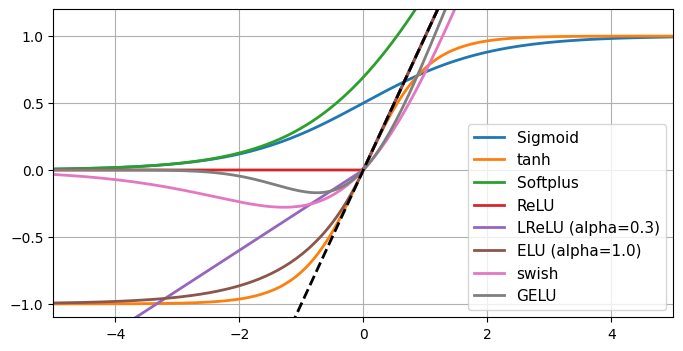

In [3]:
import numpy as np; np.set_printoptions(precision=4); import matplotlib.pyplot as plt
import tensorflow as tf; from tensorflow import keras
a = tf.linspace(-5, 5, 200);
plt.figure(figsize=(8, 4)); plt.grid(True); plt.axis([-5, 5, -1.1, 1.2])
plt.plot(a, tf.keras.activations.sigmoid(a), linewidth=2, label="Sigmoid")
plt.plot(a, tf.keras.activations.tanh(a), linewidth=2, label="tanh")
plt.plot(a, tf.keras.activations.softplus(a), linewidth=2, label="Softplus")
plt.plot(a, tf.keras.activations.relu(a), linewidth=2, label="ReLU")
plt.plot(a, tf.keras.layers.LeakyReLU(alpha=0.3)(a), linewidth=2, label="LReLU (alpha=0.3)")
plt.plot(a, tf.keras.activations.elu(a, alpha=1.0), linewidth=2, label="ELU (alpha=1.0)")
plt.plot(a, tf.keras.activations.swish(a), linewidth=2, label="swish")
plt.plot(a, tf.keras.activations.gelu(a), linewidth=2, label="GELU")
plt.plot([-5, 5], [-5, 5], 'k--', linewidth=2)
plt.legend(loc="lower right", fontsize=11);

**Derivadas:**

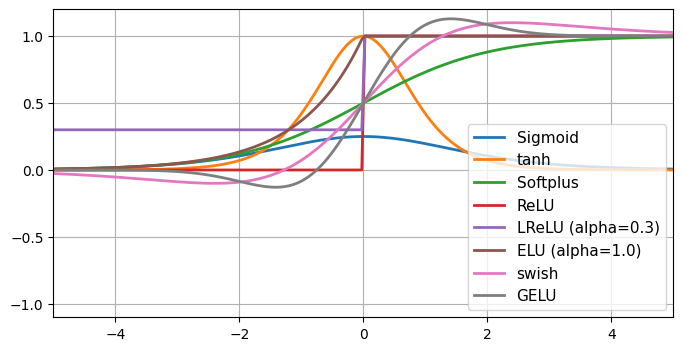

In [2]:
import numpy as np; np.set_printoptions(precision=4); import matplotlib.pyplot as plt
import tensorflow as tf; from tensorflow import keras
a = tf.linspace(-5, 5, 200);
plt.figure(figsize=(8, 4)); plt.grid(True); plt.axis([-5, 5, -1.1, 1.2])
def der(f):
    with tf.GradientTape() as g: g.watch(a); return g.gradient(f(a), a)
plt.plot(a, der(tf.keras.activations.sigmoid), linewidth=2, label="Sigmoid")
plt.plot(a, der(tf.keras.activations.tanh), linewidth=2, label="tanh")
plt.plot(a, der(tf.keras.activations.softplus), linewidth=2, label="Softplus")
plt.plot(a, der(tf.keras.activations.relu), linewidth=2, label="ReLU")
plt.plot(a, der(tf.keras.layers.LeakyReLU(alpha=0.3)), linewidth=2, label="LReLU (alpha=0.3)")
plt.plot(a, der(tf.keras.activations.elu), linewidth=2, label="ELU (alpha=1.0)")
plt.plot(a, der(tf.keras.activations.swish), linewidth=2, label="swish")
plt.plot(a, der(tf.keras.activations.gelu), linewidth=2, label="GELU")
plt.legend(loc="lower right", fontsize=11);

## Funciones de activación no saturantes

* La sigmoide y tanh saturan a $[0,1]$ y $[-1,1]$, por lo que favorecen gradientes nulos con pre-activaciones elevadas (en valor absoluto)
* El resto de funciones no satura con pre-activaciones positivas, aunque sí con negativas
* **Problema de la ReLU "muerta":** $\;$ la ReLU produce gradientes nulos con demasiada facilidad (ante pre-activaciones negativas)
* Las funciones no saturantes alternativas a la ReLU pueden verse como variantes de la misma que añaden parámetros (de valores prefijados o no) para aliviar el problema de la ReLU muerta